# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# Lior M. 2562 
# Abed alhafeed H. 9866
# Amit H. 4541

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
df = pd.read_csv("titanic_train.csv")

df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [4]:
df.shape

(712, 8)

In [5]:
df = df[[col for col in df.columns if col !='Survived']+ ['Survived']]  
corr = df.corr()
corr

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.126986,-0.319927,0.093572,0.048225,-0.543722,0.040708,-0.324024
Sex,0.126986,1.000000,0.089108,-0.079976,-0.242467,-0.183650,-0.124908,-0.550699
Age,-0.319927,0.089108,1.000000,-0.270404,-0.202725,0.071787,0.031524,-0.072729
SibSp,0.093572,-0.079976,-0.270404,1.000000,0.415491,0.136861,-0.049109,-0.031052
Parch,0.048225,-0.242467,-0.202725,0.415491,1.000000,0.151631,-0.072698,0.074699
Fare,-0.543722,-0.183650,0.071787,0.136861,0.151631,1.000000,0.078197,0.264345
Embarked,0.040708,-0.124908,0.031524,-0.049109,-0.072698,0.078197,1.000000,0.099162
Survived,-0.324024,-0.550699,-0.072729,-0.031052,0.074699,0.264345,0.099162,1.000000


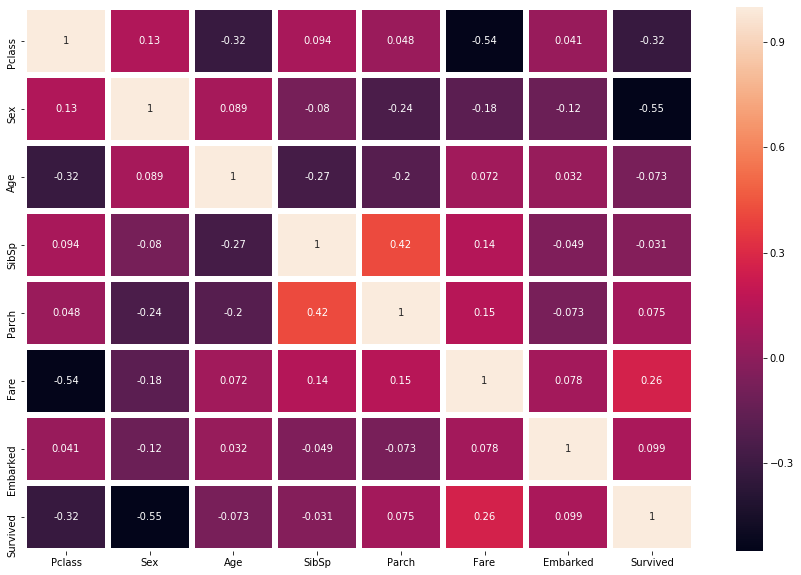

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=5, annot=True)

In [7]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


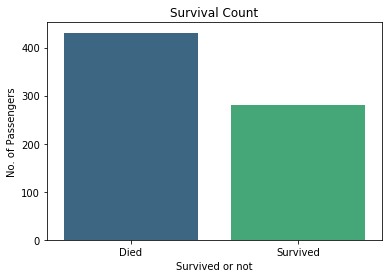

In [8]:
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count')
plt.ylabel('No. of Passengers')
plt.xlabel("Survived or not")
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()

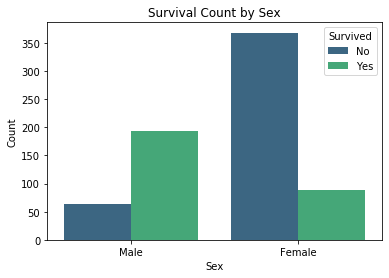

In [9]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='viridis')
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


[]

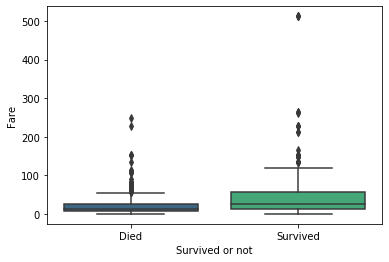

In [10]:
ax=sns.boxplot(data=df, x='Survived', y='Fare', palette='viridis')
ax.set_xticklabels(['Died', 'Survived'])
plt.xlabel("Survived or not")
plt.plot()

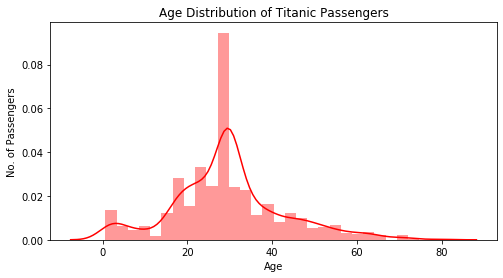

In [11]:
plt.figure(figsize=(8, 4))
sns.distplot(df['Age'], bins=30, kde=True, color='red')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('No. of Passengers')
plt.show()

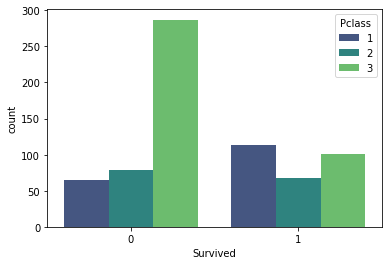

In [12]:
sns.countplot(x='Survived', hue='Pclass', data=df, palette='viridis')

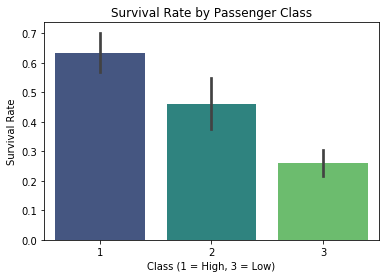

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Class (1 = High, 3 = Low)')
plt.show()

([<matplotlib.axis.XTick at 0x2b8ce4ed2e8>,
 <a list of 2 Text xticklabel objects>)

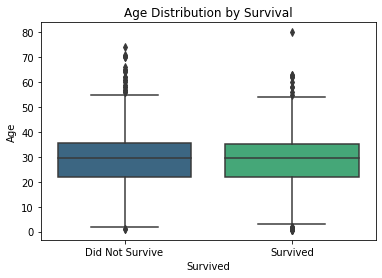

In [14]:
sns.boxplot(data=df, x="Survived", y="Age", palette="viridis")
plt.title("Age Distribution by Survival")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

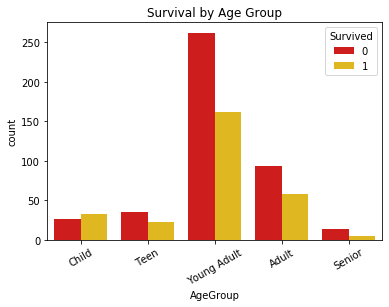

In [15]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

sns.countplot(data=df, x="AgeGroup", hue="Survived", palette="hot")
plt.title("Survival by Age Group")
plt.xticks(rotation=30)


## Part 3 - Experiments
You could add as many code cells as needed

In [16]:
df_copy = df.copy() 


age_group_mapping = {'Child': 1, 'Teen': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
df_copy['AgeGroup'] = df_copy['AgeGroup'].map(age_group_mapping)




df_copy['Family_Size'] = df_copy['SibSp'] + df_copy['Parch'] + 1
df_copy = df_copy.drop('SibSp', axis=1)
df_copy = df_copy.drop('Parch', axis=1)


df_copy = df_copy.drop('Age', axis=1)
#print(df_copy)

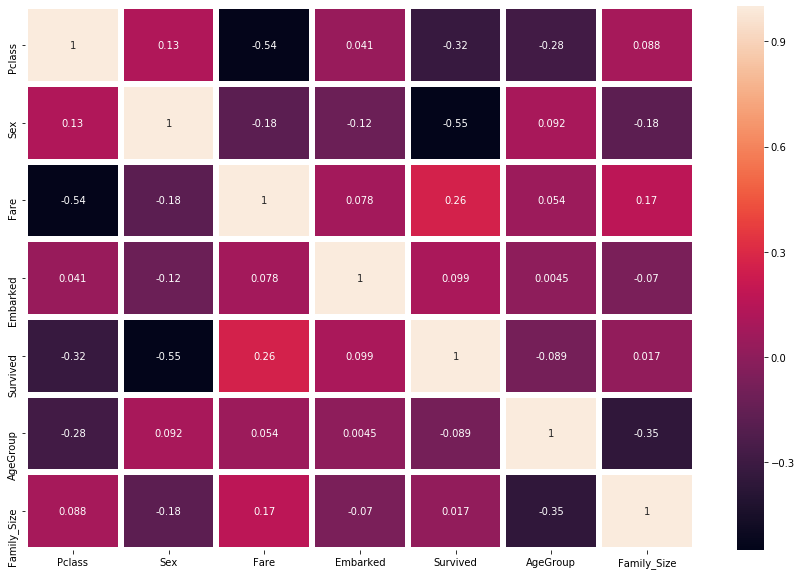

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(),linewidths=5, annot=True)

In [18]:
df_copy.head()

,Pclass,Sex,Fare,Embarked,Survived,AgeGroup,Family_Size
0,1,0,78.2667,1,1,4,2
1,2,0,13.5000,0,1,4,1
2,3,1,9.5000,0,0,3,1
3,3,1,7.8958,0,0,4,1
4,3,1,8.0500,0,0,3,1


In [19]:
x= df_copy.drop('Survived', axis=1)  #way x_train instead of x
y = df_copy['Survived']     #was y_train instead of y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
param_grid = {'n_neighbors': range(1, 21)}
classifier = GridSearchCV(KNeighborsClassifier(),param_grid , scoring=make_scorer(metrics.f1_score, greater_is_better=True))
classifier.fit(x_train_scaled, y_train)
best_K = classifier.best_params_['n_neighbors']
print(best_K)

#Knn_model=KNeighborsClassifier(best_K)
#Knn_model.fit(x_train_scaled, y_train)  ## was x_text instead of x_test_scaled
#y_pred = Knn_model.predict(x_test_scaled)
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("F1 Score", f1_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))

C:\Users\abedh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


9


C:\Users\abedh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
# Random Forest

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = GridSearchCV(RandomForestClassifier(),param_grid , scoring=make_scorer(metrics.f1_score, greater_is_better=True))
random_forest.fit(x_train, y_train)

best_n = random_forest.best_params_['n_estimators']
print("Best n:",best_n)
best_max_depth = random_forest.best_params_['max_depth']
print("max_depth:",best_max_depth)
best_min_samples_split = random_forest.best_params_['min_samples_split']
print("min_samples_split:",best_min_samples_split)
best_min_samples_leaf = random_forest.best_params_['min_samples_leaf']
print("min_samples_leaf",best_min_samples_leaf)


#print(classification_report(y_test, y_pred))

C:\Users\abedh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best n: 50
max_depth: 20
min_samples_split: 2
min_samples_leaf 2


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [22]:
Knn_model=KNeighborsClassifier(best_K)
Knn_model.fit(x_train_scaled, y_train)

y_pred = Knn_model.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7762237762237763
F1 Score 0.7333333333333334
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        79
           1       0.79      0.69      0.73        64

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.77       143



In [23]:
random_forest = RandomForestClassifier(
    n_estimators=best_n,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)

random_forest.fit(x_train_scaled, y_train)

y_pred = random_forest.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8041958041958042
F1 Score 0.7666666666666666
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        79
           1       0.82      0.72      0.77        64

    accuracy                           0.80       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.81      0.80      0.80       143



In [24]:
gaussian = GaussianNB()
gaussian.fit(x_train_scaled, y_train)
y_pred = gaussian.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7482517482517482
F1 Score 0.6842105263157895
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        79
           1       0.78      0.61      0.68        64

    accuracy                           0.75       143
   macro avg       0.76      0.74      0.74       143
weighted avg       0.75      0.75      0.74       143



## Part 5 - Apply on test and show model performance estimation

In [25]:
df2 = pd.read_csv("titanic_test.csv")
df_test = df2.copy() 

df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

age_group_mapping = {'Child': 1, 'Teen': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}

df_test['AgeGroup'] = df_test['AgeGroup'].map(age_group_mapping)


df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test = df_test.drop('SibSp', axis=1)
df_test = df_test.drop('Parch', axis=1)


df_test = df_test.drop('Age', axis=1)

df_test.head()

,Pclass,Sex,Fare,Embarked,Survived,AgeGroup,Family_Size
0,3,1,7.0500,0,0,3,1
1,3,1,7.2500,0,0,3,1
2,3,1,14.5000,0,0,3,1
3,3,0,7.7500,2,0,3,1
4,3,1,56.4958,0,1,3,1


In [26]:
x = df_test.drop('Survived', axis=1) 
y_test = df_test['Survived']     

scaler = StandardScaler()

x_test_scaled = scaler.fit_transform(x)

#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

In [27]:
y_pred = Knn_model.predict(x_test_scaled)
print("Knn model:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred),2))
print("F1 Score", round(f1_score(y_test, y_pred),2))
print(classification_report(y_test, y_pred))

print("------------------------------------------------------------")
y_pred = random_forest.predict(x_test_scaled)
print("Random forest model:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred),2))
print("F1 Score", round(f1_score(y_test, y_pred),2))
print(classification_report(y_test, y_pred))

print("------------------------------------------------------------")
y_pred = gaussian.predict(x_test_scaled)
print("Gaussian model:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred),2))
print("F1 Score", round(f1_score(y_test, y_pred),2))
print(classification_report(y_test, y_pred))

Knn model:

Accuracy: 0.83
F1 Score 0.75
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       118
           1       0.73      0.77      0.75        61

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

------------------------------------------------------------
Random forest model:

Accuracy: 0.83
F1 Score 0.74
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       118
           1       0.78      0.70      0.74        61

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179

------------------------------------------------------------
Gaussian model:

Accuracy: 0.8
F1 Score 0.71
              precision    recall  f1-score   support

           0       0.85      0.8